In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from collections import Counter
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ss938719\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
vaccine_data = pd.read_csv(r'C:\Users\ss938719\Desktop\vaccination_all_tweets.csv')

In [3]:
vaccine_data.shape

(228207, 16)

In [4]:
vaccine_data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [5]:
vaccine_data.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [6]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211189 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [7]:
vaccine_data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.282070e+05,2.282070e+05,228207.000000,2.282070e+05,228207.000000,228207.000000
mean,1.407541e+18,9.605393e+04,986.736204,1.210417e+04,2.489284,10.819020
std,2.908485e+16,8.389053e+05,5293.500468,3.908233e+04,51.079821,199.527693
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.381940e+18,5.500000e+01,27.000000,5.700000e+01,0.000000,0.000000
50%,1.408133e+18,3.280000e+02,229.000000,9.960000e+02,0.000000,0.000000
75%,1.428688e+18,1.521000e+03,794.000000,7.300000e+03,1.000000,2.000000
max,1.463251e+18,1.635305e+07,582461.000000,1.299600e+06,12294.000000,54017.000000


In [69]:
# Assuming 'vaccine_data' is your DataFrame with a 'text' column

# Get a sample text from the 'text' column
sample_text = vaccine_data['text'].sample().values[0]

# Print the sample text
print(sample_text)


wetherby scottyfrommarketing cannot take credit auspol coronavirusaustralia deltavariant…


In [59]:
vaccine_data.isnull().sum()


id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
polarity            0
sentiment           0
dtype: int64

In [60]:
vaccine_data.fillna(method='ffill', inplace=True) 

In [10]:
vaccine_data.isnull().sum()


id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

### Pre-processing of data

In [11]:
vaccine_data['text'].head()


0    Same folks said daikon paste could treat a cyt...
1    While the world has been on the wrong side of ...
2    #coronavirus #SputnikV #AstraZeneca #PfizerBio...
3    Facts are immutable, Senator, even when you're...
4    Explain to me again why we need a vaccine @Bor...
Name: text, dtype: object

In [12]:
# Lowercase

vaccine_data['text'] = vaccine_data['text'].str.lower()
vaccine_data['text'].head()


0    same folks said daikon paste could treat a cyt...
1    while the world has been on the wrong side of ...
2    #coronavirus #sputnikv #astrazeneca #pfizerbio...
3    facts are immutable, senator, even when you're...
4    explain to me again why we need a vaccine @bor...
Name: text, dtype: object

In [13]:
import pandas as pd
import re

# Assuming 'vaccine_data' is your DataFrame with a 'text' column

# Create a copy of the 'text' column before removing URLs
text_before = vaccine_data['text'].copy()

# Remove URLs from the 'text' column
vaccine_data['text'] = vaccine_data['text'].apply(lambda x: re.sub(r"http\S+", "", x))

# Create a DataFrame to display the difference
diff_df = pd.DataFrame({'Before': text_before, 'After': vaccine_data['text']})

# Print the difference
print(diff_df.head())


                                              Before  \
0  same folks said daikon paste could treat a cyt...   
1  while the world has been on the wrong side of ...   
2  #coronavirus #sputnikv #astrazeneca #pfizerbio...   
3  facts are immutable, senator, even when you're...   
4  explain to me again why we need a vaccine @bor...   

                                               After  
0  same folks said daikon paste could treat a cyt...  
1  while the world has been on the wrong side of ...  
2  #coronavirus #sputnikv #astrazeneca #pfizerbio...  
3  facts are immutable, senator, even when you're...  
4  explain to me again why we need a vaccine @bor...  


In [14]:
import pandas as pd
import string

# Assuming 'vaccine_data' is your DataFrame with a 'text' column

# Create a copy of the 'text' column before removing punctuation
text_before = vaccine_data['text'].copy()

# Define the punctuation marks to remove
punctuation_removal = string.punctuation

# Custom function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation_removal))

# Remove punctuation from the 'text' column
vaccine_data['text'] = vaccine_data['text'].apply(remove_punctuation)

# Create a DataFrame to display the difference
diff_df = pd.DataFrame({'Before': text_before, 'After': vaccine_data['text']})

# Print the difference
print(diff_df.head())


                                              Before  \
0  same folks said daikon paste could treat a cyt...   
1  while the world has been on the wrong side of ...   
2  #coronavirus #sputnikv #astrazeneca #pfizerbio...   
3  facts are immutable, senator, even when you're...   
4  explain to me again why we need a vaccine @bor...   

                                               After  
0  same folks said daikon paste could treat a cyt...  
1  while the world has been on the wrong side of ...  
2  coronavirus sputnikv astrazeneca pfizerbiontec...  
3  facts are immutable senator even when youre no...  
4  explain to me again why we need a vaccine bori...  


In [15]:
import pandas as pd
import re

# Assuming 'vaccine_data' is your DataFrame with a 'text' column

# Create a copy of the 'text' column before removing single characters and double spaces
text_before = vaccine_data['text'].copy()

# Remove single characters surrounded by spaces
vaccine_data['text'] = vaccine_data['text'].apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Remove double spaces
vaccine_data['text'] = vaccine_data['text'].apply(lambda x: re.sub(r'\s+', ' ', x, flags=re.I))

# Create a DataFrame to display the difference
diff_df = pd.DataFrame({'Before': text_before, 'After': vaccine_data['text']})

# Print the difference
print(diff_df.head())


                                              Before  \
0  same folks said daikon paste could treat a cyt...   
1  while the world has been on the wrong side of ...   
2  coronavirus sputnikv astrazeneca pfizerbiontec...   
3  facts are immutable senator even when youre no...   
4  explain to me again why we need a vaccine bori...   

                                               After  
0  same folks said daikon paste could treatcytoki...  
1  while the world has been on the wrong side of ...  
2  coronavirus sputnikv astrazeneca pfizerbiontec...  
3  facts are immutable senator even when youre no...  
4  explain to me again why we needvaccine borisjo...  


In [16]:
import pandas as pd
from nltk.corpus import stopwords

# Assuming 'vaccine_data' is your DataFrame with a 'text' column

# Create a copy of the 'text' column before removing stopwords
text_before = vaccine_data['text'].copy()

# Get the stopwords for English language
STOPWORDS = set(stopwords.words('english'))

# Custom function to remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# Remove stopwords from the 'text' columnz
vaccine_data['text'] = vaccine_data['text'].apply(remove_stopwords)

# Create a DataFrame to display the difference
diff_df = pd.DataFrame({'Before': text_before, 'After': vaccine_data['text']})

# Print the difference
print(diff_df.head())


                                              Before  \
0  same folks said daikon paste could treatcytoki...   
1  while the world has been on the wrong side of ...   
2  coronavirus sputnikv astrazeneca pfizerbiontec...   
3  facts are immutable senator even when youre no...   
4  explain to me again why we needvaccine borisjo...   

                                               After  
0  folks said daikon paste could treatcytokine st...  
1  world wrong side history year hopefully bigges...  
2  coronavirus sputnikv astrazeneca pfizerbiontec...  
3  facts immutable senator even youre ethically s...  
4  explain needvaccine borisjohnson matthancock w...  


In [17]:
# Emoji Removal
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
vaccine_data["text"] = vaccine_data["text"].apply(str)
vaccine_data["text"] = vaccine_data["text"].apply(remove_emoji)

In [18]:
import pandas as pd
import re

# Assuming 'vaccine_data' is your DataFrame with a 'text' column

# Custom function to remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Remove numbers from the 'text' column
vaccine_data['text'] = vaccine_data['text'].apply(remove_numbers)


In [19]:
# Most common words in the text
from collections import Counter
cnt = Counter()
for text in vaccine_data["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('covaxin', 73588),
 ('vaccine', 51496),
 ('moderna', 47067),
 ('dose', 43495),
 ('covid', 39941),
 ('slots', 35471),
 ('age', 25414),
 ('d', 23061),
 ('covidvaccine', 14864),
 ('pfizer', 14390)]

In [20]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


# Instantiate the VADER model
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Generate polarity scores for the text data
vaccine_data['polarity'] = vaccine_data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Create a 'sentiment' column based on the polarity scores
vaccine_data['sentiment'] = vaccine_data['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ss938719\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
vaccine_data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,polarity,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,folks said daikon paste could treatcytokine st...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.0000,neutral
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,world wrong side history year hopefully bigges...,['PfizerBioNTech'],Twitter Web App,1,1,False,-0.1027,negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.2500,positive
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,facts immutable senator even youre ethically s...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter Web App,446,2129,False,0.0000,neutral
4,1337854064604966912,Citizen News Channel,"Vancouver, BC - Canada",Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,explain needvaccine borisjohnson matthancock w...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,0.0000,neutral


In [22]:
nltk.download('punkt')
import nltk
from nltk.tokenize import word_tokenize

# Assuming 'df' is your DataFrame and 'text_column' is the name of the text column
text_data = vaccine_data['text']

# Tokenize the text column
tokenized_text = text_data.apply(word_tokenize)

# Print the tokenized text
print(tokenized_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ss938719\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0         [folks, said, daikon, paste, could, treatcytok...
1         [world, wrong, side, history, year, hopefully,...
2         [coronavirus, sputnikv, astrazeneca, pfizerbio...
3         [facts, immutable, senator, even, youre, ethic...
4         [explain, needvaccine, borisjohnson, matthanco...
                                ...                        
228202    [urban, bengaluru, covidvaccine, availability,...
228203    [bbmp, bengaluru, covidvaccine, availability, ...
228204    [urban, bengaluru, covidvaccine, availability,...
228205    [promote, vaccines, leaving, stronger, russia,...
228206    [urban, bengaluru, covidvaccine, availability,...
Name: text, Length: 228207, dtype: object


In [23]:
import nltk
from nltk.stem import PorterStemmer

# Assuming 'tokenized_text' contains the tokenized text column
stemmed_text = []

# Create an instance of the PorterStemmer
stemmer = PorterStemmer()

# Perform stemming on each tokenized text sample
for tokens in tokenized_text:
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    stemmed_text.append(stemmed_tokens)

# Print the stemmed text
# Assuming 'stemmed_text' contains the tokenized or stemmed text column
text_index = 0  # Index of the text you want to print

# Print the text at the specified index
print(stemmed_text[text_index])


['folk', 'said', 'daikon', 'past', 'could', 'treatcytokin', 'storm', 'pfizerbiontech']


<Axes: >

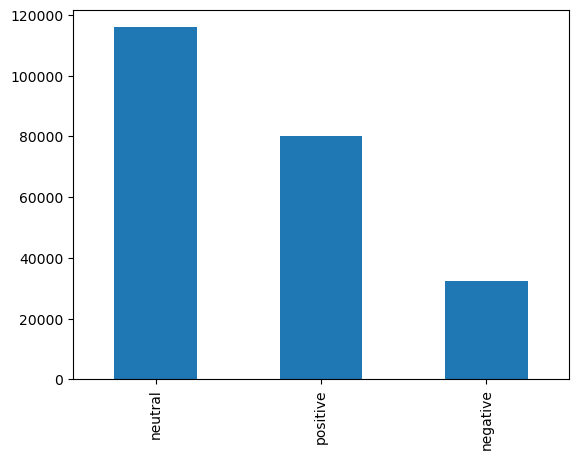

In [24]:
vaccine_data['sentiment'].value_counts().plot(kind='bar')


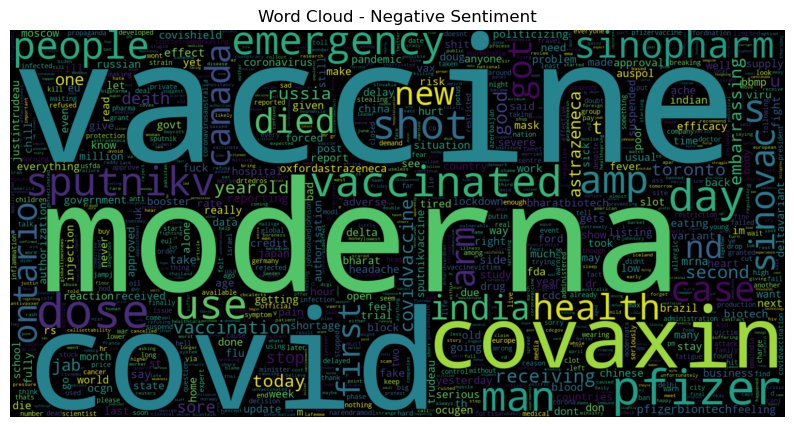

In [54]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'vaccine_data' is your DataFrame with 'text' and 'sentiment' columns

# Filter the data for negative sentiment
data_neg = vaccine_data[vaccine_data['sentiment'] == 'negative']['text']

# Concatenate the text data for negative sentiment
text_neg = " ".join(data_neg)

# Generate the word cloud for negative sentiment
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text_neg)


# Create a figure and axes
plt.figure(figsize=(10, 10))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Set the title
plt.title('Word Cloud - Negative Sentiment')

# Show the plot
plt.show()


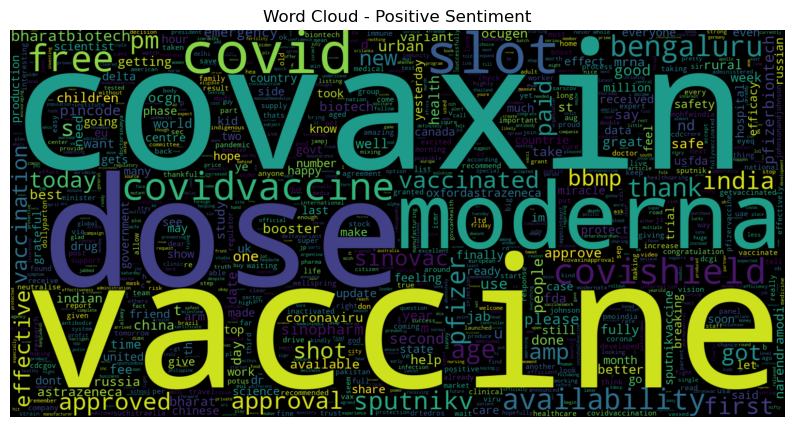

In [26]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'vaccine_data' is your DataFrame with 'text' and 'sentiment' columns

# Filter the data for positive sentiment
data_pos = vaccine_data[vaccine_data['sentiment'] == 'positive']['text']

# Concatenate the text data for positive sentiment
text_pos = " ".join(data_pos)

# Generate the word cloud for positive sentiment
wordcloud = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(text_pos)

# Create a figure and axes
plt.figure(figsize=(10, 10))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Set the title
plt.title('Word Cloud - Positive Sentiment')

# Show the plot
plt.show()


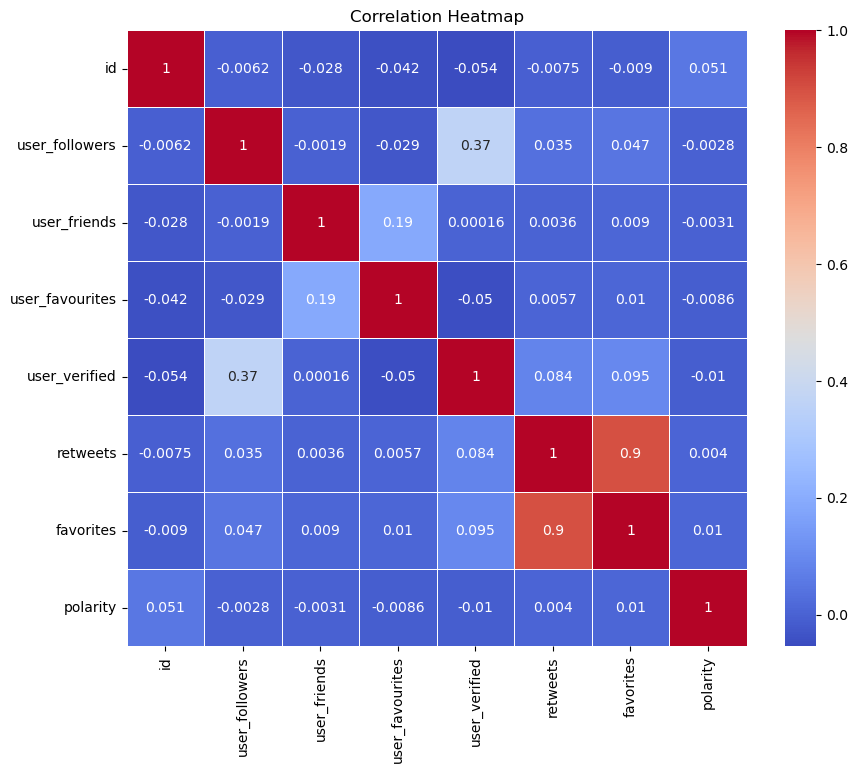

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset

# Drop the "is_retweet" column from the dataset
data = vaccine_data.drop("is_retweet", axis=1)

# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [28]:
vaccine_data = vaccine_data.sample(frac=0.2, random_state=42)


In [29]:
vaccine_data.shape

(45641, 18)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert the text data to numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer()
label_encoder = LabelEncoder()

X = vectorizer.fit_transform(vaccine_data['text'])
y = label_encoder.fit_transform(vaccine_data['sentiment'])



In [31]:
X.shape

(45641, 45768)

In [32]:
y.shape

(45641,)

In [33]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


svm = SVC(kernel='rbf')

# Train the SVM model
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = svm.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred_svm)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.53      0.67      1276
           1       0.84      0.99      0.91      4639
           2       0.93      0.84      0.89      3214

    accuracy                           0.87      9129
   macro avg       0.90      0.79      0.82      9129
weighted avg       0.88      0.87      0.87      9129



[[ 676  446  154]
 [   8 4597   34]
 [  55  456 2703]]


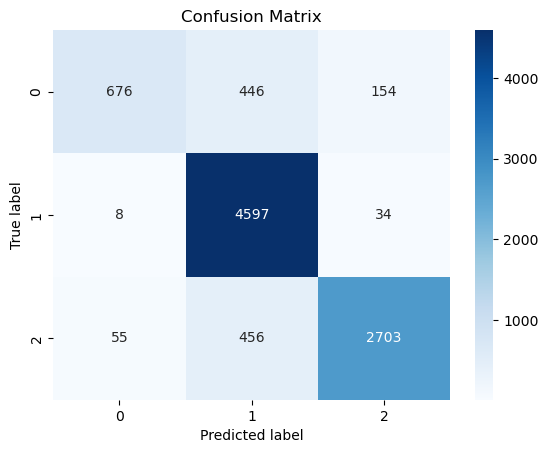

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your SVM model and obtained the predictions on the testing data

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Assuming 'X_train' is the training data and 'y_train' is the corresponding target variable

# Create and train the Naive Bayes classifier
nb = MultinomialNB(alpha=0.5, fit_prior=False)
nb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_nb = nb.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred_nb)
print(report)


              precision    recall  f1-score   support

           0       0.51      0.71      0.59      1276
           1       0.94      0.71      0.81      4639
           2       0.74      0.88      0.80      3214

    accuracy                           0.77      9129
   macro avg       0.73      0.77      0.74      9129
weighted avg       0.81      0.77      0.78      9129



[[ 903   84  289]
 [ 614 3292  733]
 [ 251  122 2841]]


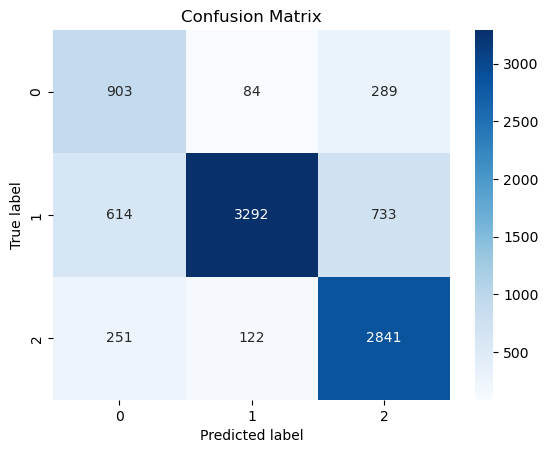

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your SVM model and obtained the predictions on the testing data

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming 'X_train' is the training data and 'y_train' is the corresponding target variable

# Create and train the Random Forest classifier with updated hyperparameters
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred_rf)
print(report)


              precision    recall  f1-score   support

           0       0.92      0.57      0.70      1276
           1       0.85      0.99      0.91      4639
           2       0.92      0.85      0.88      3214

    accuracy                           0.88      9129
   macro avg       0.90      0.80      0.83      9129
weighted avg       0.89      0.88      0.87      9129



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your SVM model and obtained the predictions on the testing data

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


NameError: name 'y_test' is not defined

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming 'X_train' is the training data and 'y_train' is the corresponding target variable

# Create and train the Logistic Regression classifier
logreg = LogisticRegression(C=1.0, max_iter=100)
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = logreg.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred_lr)
print(report)


NameError: name 'X_train' is not defined

[[ 682  428  166]
 [  18 4573   48]
 [  65  397 2752]]


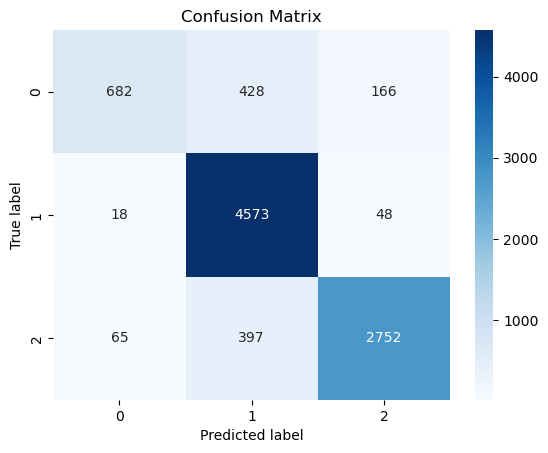

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your SVM model and obtained the predictions on the testing data

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


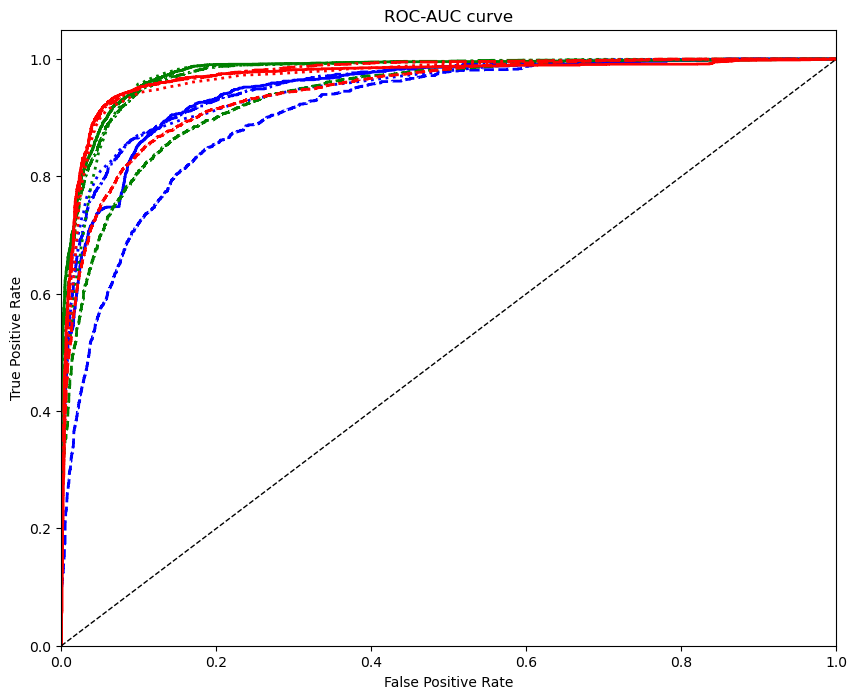

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Convert the target variables to binary format
y_test_bin = label_binarize(y_test, classes=range(len(set(y_test))))

# Compute the probability scores for each class using each classifier
y_scores_svm = svm.decision_function(X_test)
y_scores_nb = nb.predict_proba(X_test)
y_scores_rf = rf.predict_proba(X_test)
y_scores_lr = logreg.predict_proba(X_test)

# Compute the False Positive Rate (FPR), True Positive Rate (TPR), and AUC for each class
fpr_svm = dict()
tpr_svm = dict()
auc_svm = dict()
fpr_nb = dict()
tpr_nb = dict()
auc_nb = dict()
fpr_rf = dict()
tpr_rf = dict()
auc_rf = dict()
fpr_lr = dict()
tpr_lr = dict()
auc_lr = dict()

for i in range(len(set(y_test))):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_bin[:, i], y_scores_svm[:, i])
    auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])
    
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test_bin[:, i], y_scores_nb[:, i])
    auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])
    
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_scores_rf[:, i])
    auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])
    
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test_bin[:, i], y_scores_lr[:, i])
    auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'orange']  # Customize colors for each class

for i in range(len(set(y_test))):
    plt.plot(fpr_svm[i], tpr_svm[i], color=colors[i], lw=2, label='SVM Class %d (AUC = %0.2f)' % (i, auc_svm[i]))
    plt.plot(fpr_nb[i], tpr_nb[i], color=colors[i], linestyle='--', lw=2, label='Naive Bayes Class %d (AUC = %0.2f)' % (i, auc_nb[i]))
    plt.plot(fpr_rf[i], tpr_rf[i], color=colors[i], linestyle=':', lw=2, label='Random Forest Class %d (AUC = %0.2f)' % (i, auc_rf[i]))
    plt.plot(fpr_lr[i], tpr_lr[i], color=colors[i], linestyle='-.', lw=2, label='Logistic Regression Class %d (AUC = %0.2f)' % (i, auc_lr[i]))

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.show()


In [40]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming you have already trained and evaluated the classifiers and stored the accuracy scores
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)


# Create a dictionary to store the accuracy scores
accuracy_scores = {
    'Algorithm': ['SVM', 'Naive Bayes', 'Random Forest', 'Logistic Regression'],
    'Accuracy': [accuracy_svm, accuracy_nb, accuracy_rf, accuracy_lr]
}

# Create a DataFrame from the dictionary
accuracy_table = pd.DataFrame(accuracy_scores)

# Print the accuracy table
print(accuracy_table)


             Algorithm  Accuracy
0                  SVM  0.873699
1          Naive Bayes  0.770731
2        Random Forest  0.880381
3  Logistic Regression  0.877095


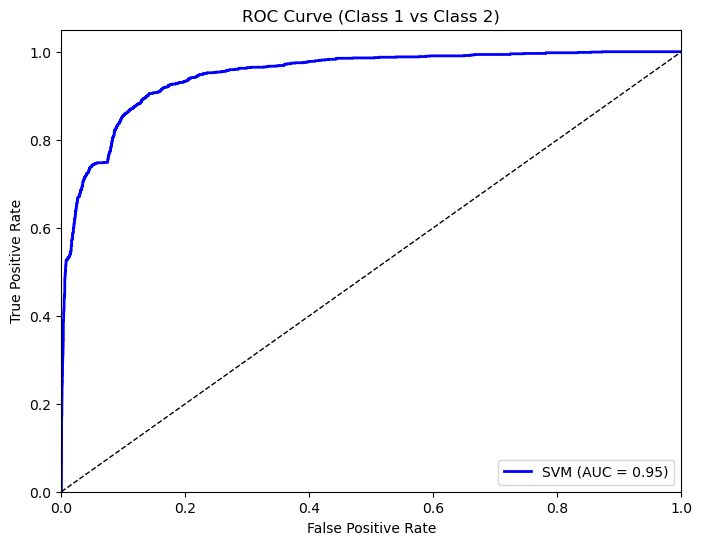

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have the true labels in y_test and the predicted probabilities in y_scores_svm

# Select the desired classes for the ROC curve
class_1_index = 0  # Index of class 1
class_2_index = 2  # Index of class 2

# Select the corresponding true labels and predicted probabilities for the two classes
y_test_bin_2classes = y_test_bin[:, [class_1_index, class_2_index]]
y_scores_svm_2classes = y_scores_svm[:, [class_1_index, class_2_index]]

# Compute the False Positive Rate (FPR), True Positive Rate (TPR), and AUC for the two classes
fpr_svm, tpr_svm, _ = roc_curve(y_test_bin_2classes[:, 0], y_scores_svm_2classes[:, 0])
auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curve for the two classes
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label='SVM (AUC = %0.2f)' % auc_svm)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Class 1 vs Class 2)')
plt.legend(loc="lower right")
plt.show()
